<a href="https://colab.research.google.com/github/Pronoy2324/Laptop_price_predictor/blob/main/rlaptop_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [316]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [241]:
df =pd.read_csv('/content/drive/MyDrive/datasets/laptop_data.csv')

In [242]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [243]:
df.nunique()

Unnamed: 0          1303
Company               19
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price                791
dtype: int64

In [245]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

In [246]:
df['IPS_panel']=df['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)

In [247]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [248]:
df['x_res']=new.iloc[:,0].str.extract('(\d+)')
df['y_res']=new.iloc[:,1]

In [250]:
df['Ram']=df['Ram'].apply(lambda x : x.replace('GB',''))
df['Weight']=df['Weight'].apply(lambda x : x.replace('kg',''))

In [251]:
def memory_ext(x,tech):
  if tech in x:
    index= x.split(' ').index(tech)-1
    return x.split(' ')[index]
  else:
    return 0

In [252]:
df['SSD']=df['Memory'].apply(memory_ext,tech='SSD')

In [253]:
df['HDD']=df['Memory'].apply(memory_ext,tech='HDD')

In [254]:
df['Flash']=df['Memory'].apply(memory_ext,tech='Flash')
df['Hybrid']=df['Memory'].apply(memory_ext,tech='Hybrid')

In [257]:
def tb_to_gb(x):
  if x != 0:
    if 'TB' in x:
      return int(float(x.replace('TB','')) * 1024)
    elif 'GB' in x:
      return int(x.replace('GB',''))
  else:
    return 0

In [258]:
df['HDD']=df['HDD'].apply(tb_to_gb)

In [259]:
df['SSD']=df['SSD'].apply(tb_to_gb)

In [260]:
df['Flash']=df['Flash'].apply(tb_to_gb)

In [261]:
df['Hybrid']=df['Hybrid'].apply(tb_to_gb)

In [279]:
def cpu_ext(x):
  if 'Intel' in x:
    if 'i3' in x.split(' ') or 'i5' in x.split(' ') or 'i7' in x.split(' '):
      return ' '.join(x.split(' ')[0:3])
    else:
      return 'Intel Others'
  elif 'AMD' in x:
    if 'A9-Series' in x.split(' ') or 'A6-Series' in x.split(' ') or 'A12-Series' in x.split(' '):
      return ' '.join(x.split(' ')[0:2])
    else:
      return 'AMD Other'
  else:
    return 'Others'

def Gpu_ext(x):
  if 'Nvidia' in x:   
    return 'Nvidia'
  elif 'Intel' in x:
    return 'Intel'
  elif 'AMD' in x:
    return 'AMD'
  else:
    return 'others'

def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [266]:
df['Cpu_name']=df['Cpu'].apply(cpu_ext)

In [276]:
df['Gpu_brand']=df['Gpu'].apply(Gpu_ext)

In [281]:
df['OpSys']=df['OpSys'].apply(cat_os)

In [286]:
df['x_res']=df['x_res'].astype('int64')

In [287]:
df['y_res']=df['y_res'].astype('int64')

In [288]:
df['ppi'] = (((df['x_res']**2) + (df['y_res']**2))**0.5/df['Inches']).astype('float')

In [305]:
df['Weight']=df['Weight'].astype('float64')

In [390]:
df['Ram']=df['Ram'].astype('int64')

In [391]:
data=df.drop(['Unnamed: 0','Inches','ScreenResolution','Cpu','Gpu','Memory','x_res','y_res'],axis=1)

In [307]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS_panel,SSD,HDD,Flash,Hybrid,Cpu_name,Gpu_brand,ppi
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,128,0,0,0,Intel Core i5,Intel,226.983005
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,0,0,128,0,Intel Core i5,Intel,127.677940
2,HP,Notebook,8,Others/No OS/Linux,1.86,30636.0000,0,0,256,0,0,0,Intel Core i5,Intel,141.211998
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,512,0,0,0,Intel Core i7,AMD,220.534624
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,256,0,0,0,Intel Core i5,Intel,226.983005


### EDA

In [296]:
data.isnull().sum()

Company        0
TypeName       0
Ram            0
OpSys          0
Weight         0
Price          0
Touchscreen    0
IPS_panel      0
SSD            0
HDD            0
Flash          0
Hybrid         0
Cpu_name       0
Gpu_brand      0
ppi            0
dtype: int64

In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   object 
 3   OpSys        1303 non-null   object 
 4   Weight       1303 non-null   float64
 5   Price        1303 non-null   float64
 6   Touchscreen  1303 non-null   int64  
 7   IPS_panel    1303 non-null   int64  
 8   SSD          1303 non-null   int64  
 9   HDD          1303 non-null   int64  
 10  Flash        1303 non-null   int64  
 11  Hybrid       1303 non-null   int64  
 12  Cpu_name     1303 non-null   object 
 13  Gpu_brand    1303 non-null   object 
 14  ppi          1303 non-null   float64
dtypes: float64(3), int64(6), object(6)
memory usage: 152.8+ KB


In [310]:
data.describe(include=['object','int64','float64'])

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS_panel,SSD,HDD,Flash,Hybrid,Cpu_name,Gpu_brand,ppi
count,1303,1303,1303,1303,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303,1303,1303.000000
unique,19,6,9,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,4,NaN
top,Dell,Notebook,8,Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel Core i7,Intel,NaN
freq,297,727,619,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,527,722,NaN
mean,NaN,NaN,NaN,NaN,2.038734,59870.042910,0.147352,0.280123,183.045280,421.691481,4.555641,9.034536,NaN,NaN,141.690750
std,NaN,NaN,NaN,NaN,0.665475,37243.201786,0.354593,0.449231,186.140451,526.344470,30.274090,94.738890,NaN,NaN,33.103028
min,NaN,NaN,NaN,NaN,0.690000,9270.720000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,90.583402
25%,NaN,NaN,NaN,NaN,1.500000,31914.720000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,127.335675
50%,NaN,NaN,NaN,NaN,2.040000,52054.560000,0.000000,0.000000,256.000000,0.000000,0.000000,0.000000,NaN,NaN,141.211998
75%,NaN,NaN,NaN,NaN,2.300000,79274.246400,0.000000,1.000000,256.000000,1024.000000,0.000000,0.000000,NaN,NaN,157.350512


In [ ]:
fig = plt.subplots(figsize=(16,10))
sns.distplot(data['Price'], kde=True)
sns.histplot(data=df,x="ppi",ax=axes[0,1])
sns.histplot(data=df,x="Weight",ax=axes[0,2])
sns.distplot(data['SSD'], kde=True,ax=axes[0,3])
sns.countplot('Company',data=df,ax=axes[1,2])
sns.countplot('TypeName',data=df,ax=axes[1,3])
sns.countplot('Ram',data=df,ax=axes[0,4])
sns.countplot('Touchscreen',data=df,ax=axes[1,4])
sns.countplot('IPS_panel',data=df,ax=axes[0,5])
sns.countplot('Cpu_name',data=df,ax=axes[1,5])
plt.xticks(rotation='vertical')
plt.show()


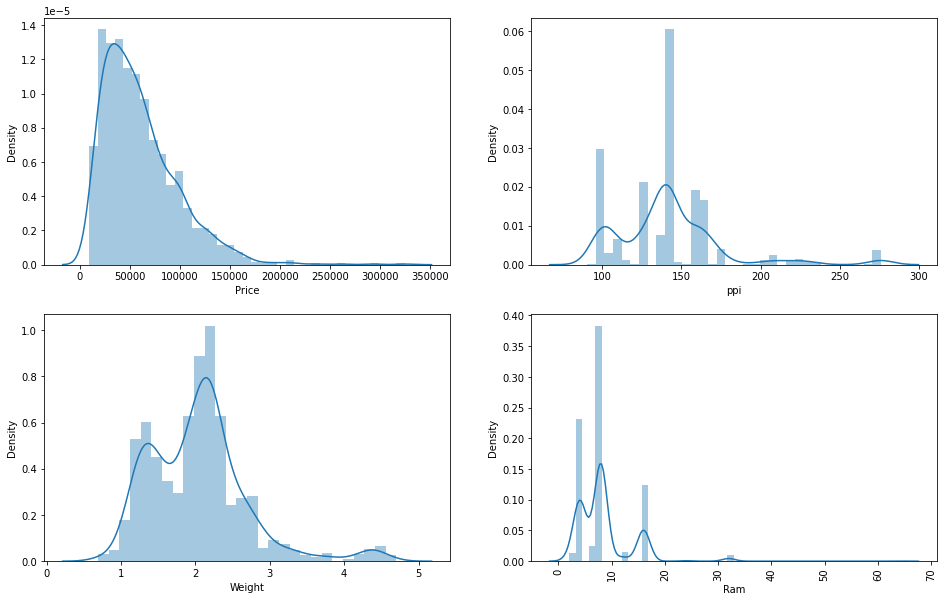

In [384]:
fig,axes = plt.subplots(2,2, figsize=(16,10))
sns.distplot(data['Price'], kde=True,ax=axes[0,0])
sns.distplot(data['ppi'], kde=True,ax=axes[0,1])
sns.distplot(data['Weight'], kde=True,ax=axes[1,0])
sns.distplot(data['Ram'], kde=True,ax=axes[1,1])
plt.xticks(rotation='vertical')
plt.show()

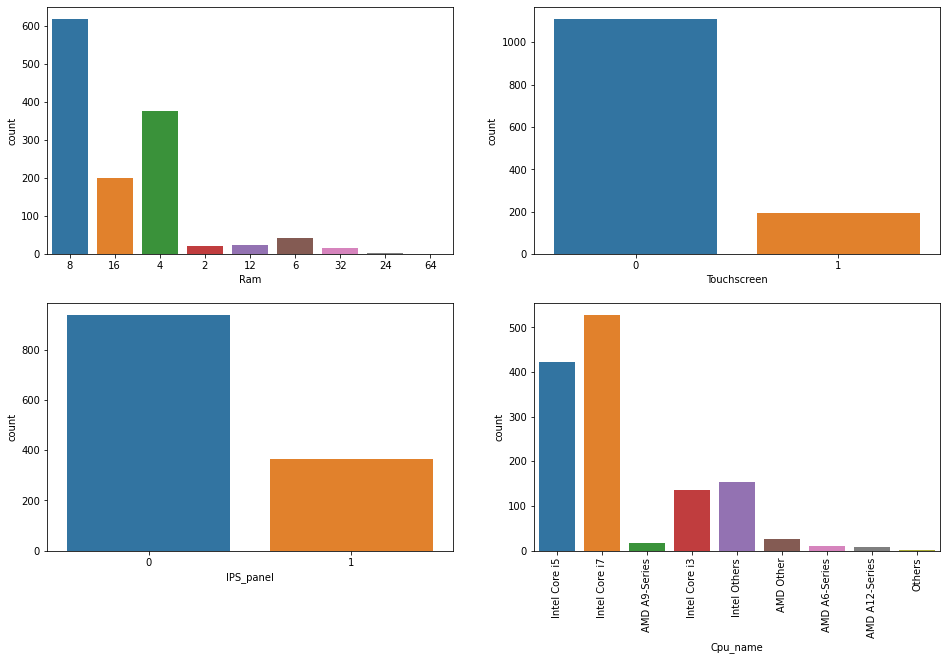

In [326]:
fig,axes = plt.subplots(2,2, figsize=(16,10))
sns.countplot('Ram',data=data,ax=axes[0,0])
sns.countplot('Touchscreen',data=data,ax=axes[0,1])
sns.countplot('IPS_panel',data=data,ax=axes[1,0])
sns.countplot('Cpu_name',data=data,ax=axes[1,1])
plt.xticks(rotation='vertical')
plt.show()

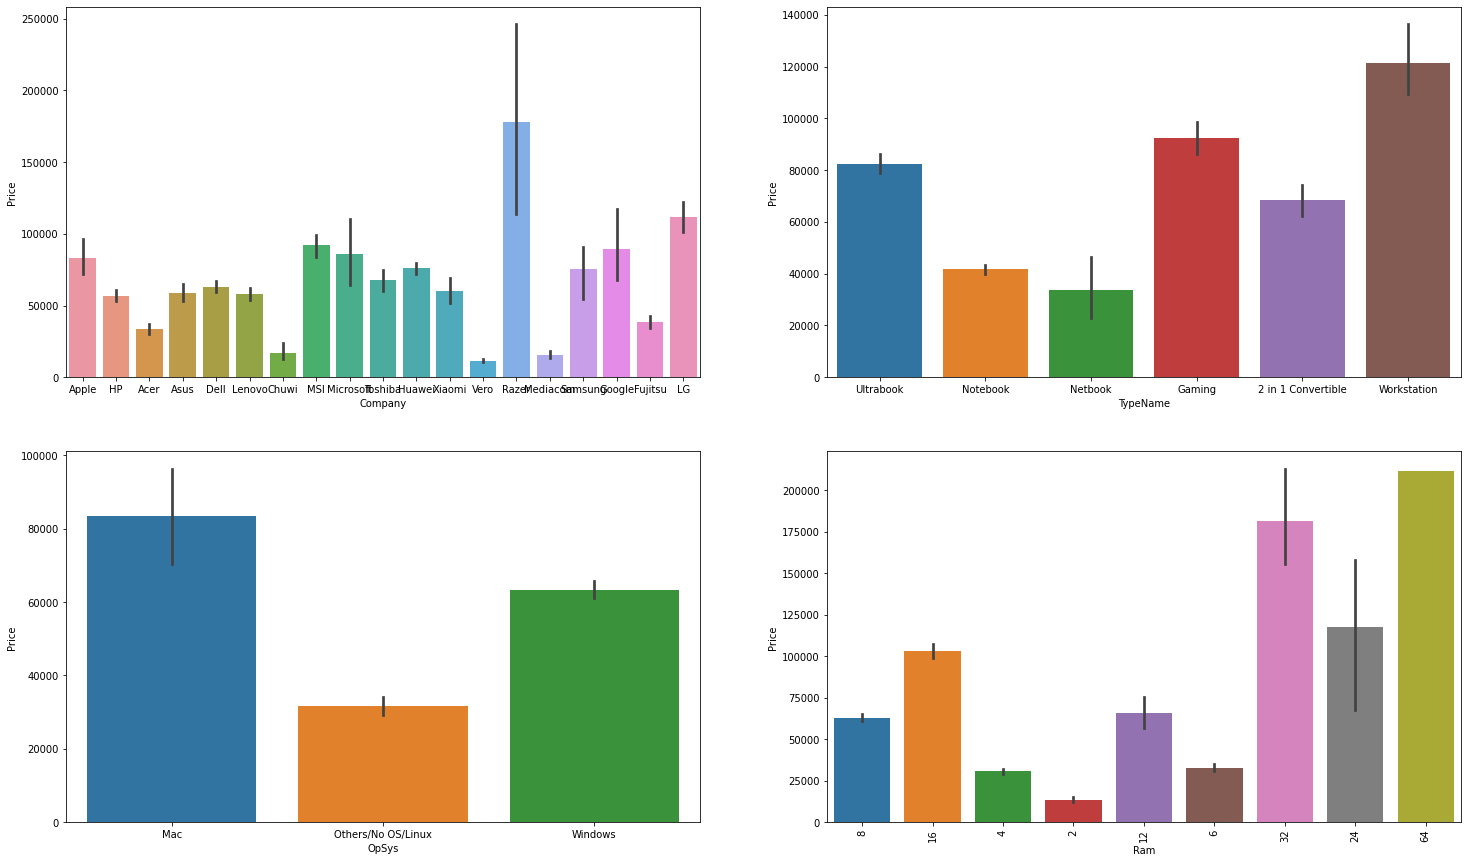

In [338]:
fig,axes = plt.subplots(2,2, figsize=(25,15))
sns.barplot(x=data['Company'],y=data['Price'],ax=axes[0,0])
sns.barplot(x=data['TypeName'],y=data['Price'],ax=axes[0,1])
sns.barplot(x=data['OpSys'],y=data['Price'],ax=axes[1,0])
sns.barplot(x=data['Ram'],y=data['Price'],ax=axes[1,1])
plt.xticks(rotation='vertical')
plt.show()

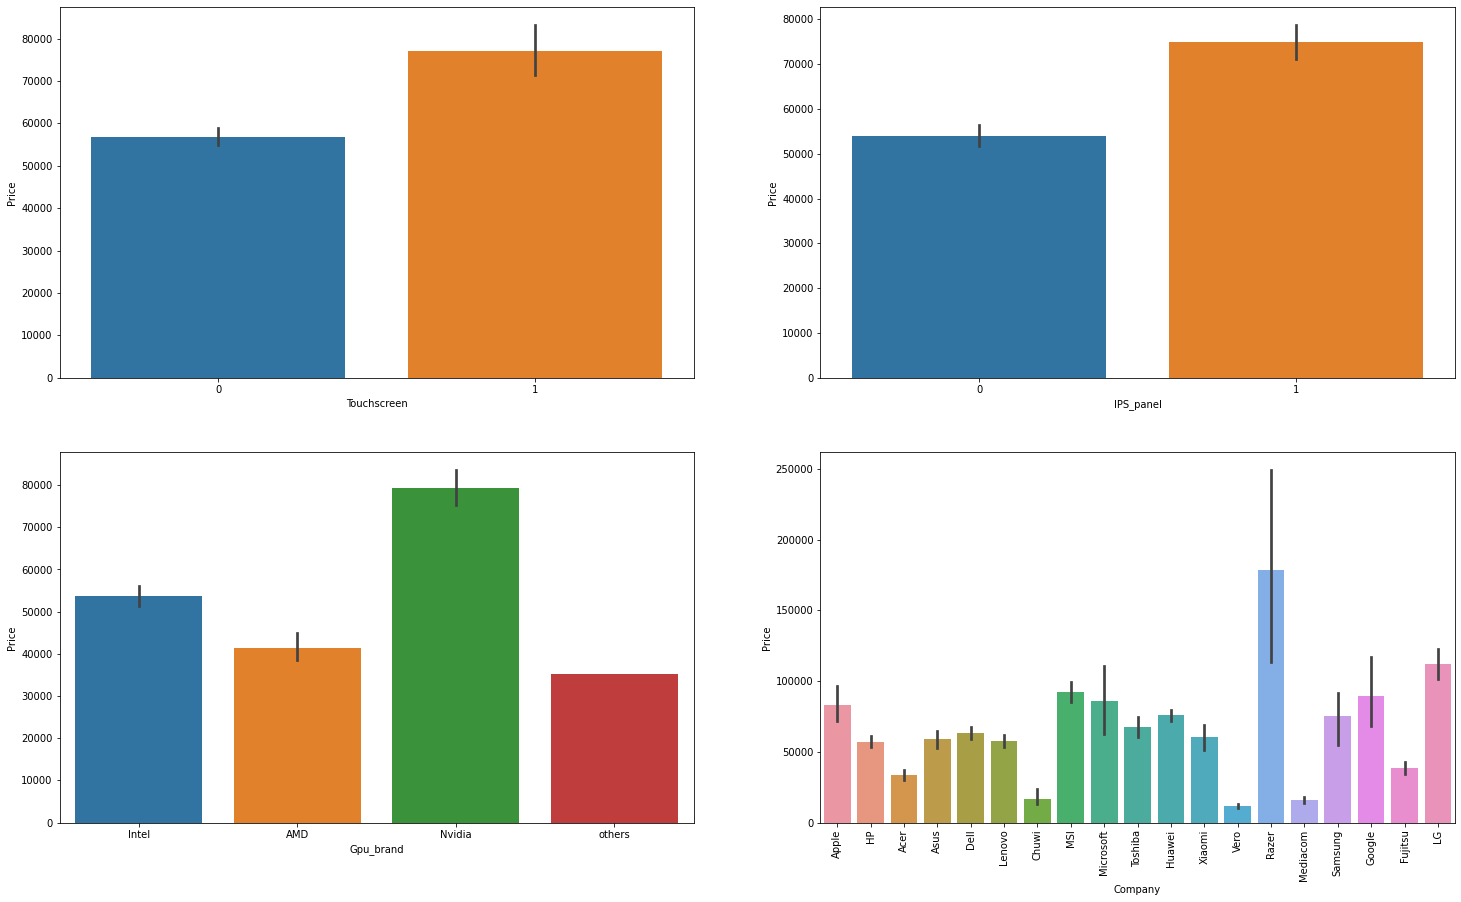

In [396]:
fig,axes = plt.subplots(2,2, figsize=(25,15))
sns.barplot(x=data['Touchscreen'],y=data['Price'],ax=axes[0,0])
sns.barplot(x=data['IPS_panel'],y=data['Price'],ax=axes[0,1])
sns.barplot(x=data['Gpu_brand'],y=data['Price'],ax=axes[1,0])
sns.barplot(x=data['Company'],y=data['Price'],ax=axes[1,1])
plt.xticks(rotation='vertical')
plt.show()

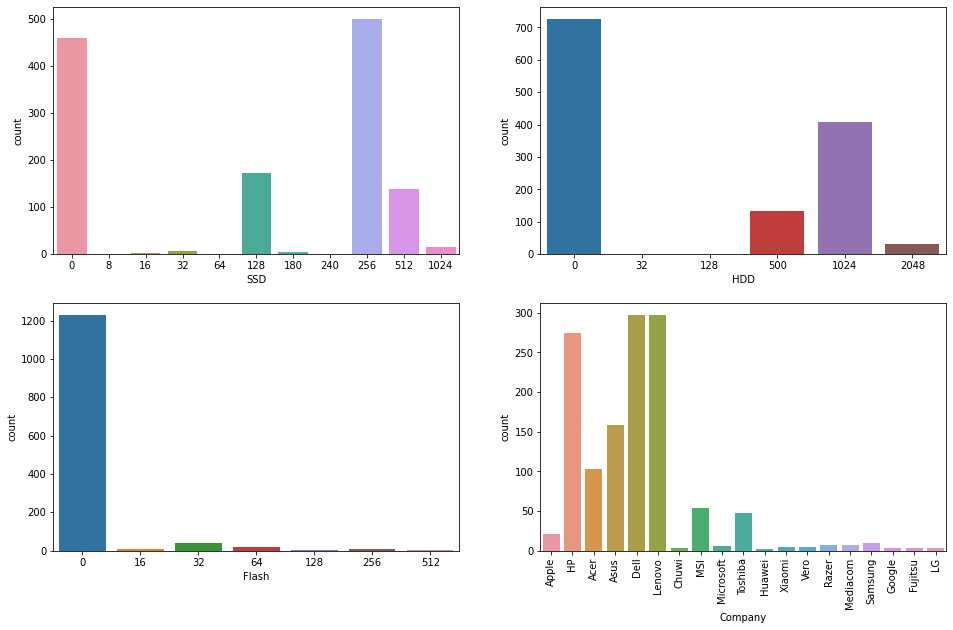

In [395]:
fig,axes = plt.subplots(2,2, figsize=(16,10))
sns.countplot('SSD',data=data,ax=axes[0,0])
sns.countplot('HDD',data=data,ax=axes[0,1])
sns.countplot('Flash',data=data,ax=axes[1,0])
sns.countplot('Company',data=data,ax=axes[1,1])
plt.xticks(rotation='vertical')
plt.show()

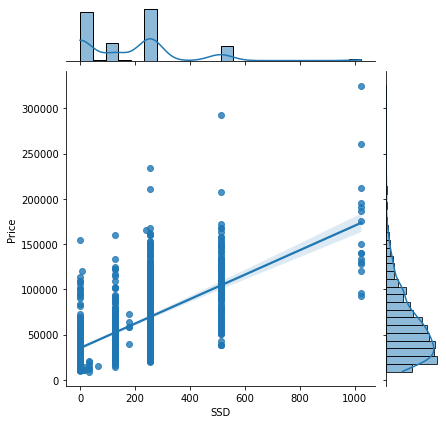

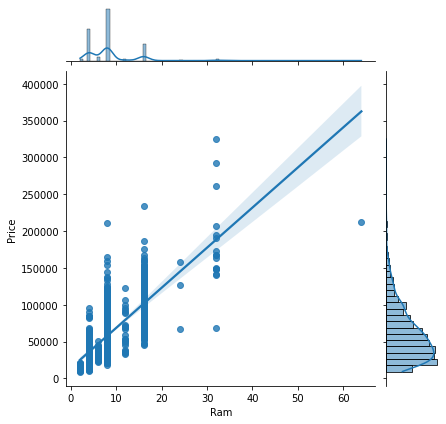

In [393]:
sns.jointplot(x = data["SSD"],y = data["Price"],data=data,kind='reg')
sns.jointplot(x = data["Ram"],y = data["Price"],data=data,kind='reg')

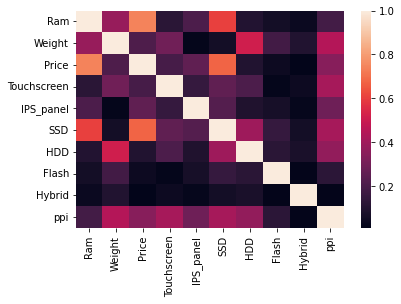

In [398]:
sns.heatmap(abs(data.corr()))

In [399]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS_panel,SSD,HDD,Flash,Hybrid,Cpu_name,Gpu_brand,ppi
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,128,0,0,0,Intel Core i5,Intel,226.983005
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,0,0,128,0,Intel Core i5,Intel,127.677940
2,HP,Notebook,8,Others/No OS/Linux,1.86,30636.0000,0,0,256,0,0,0,Intel Core i5,Intel,141.211998
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,512,0,0,0,Intel Core i7,AMD,220.534624
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,256,0,0,0,Intel Core i5,Intel,226.983005


In [400]:
# droping columns
selected_features=['Company','TypeName','OpSys','Weight','Touchscreen','IPS_panel','SSD','HDD','Cpu_name','Gpu_brand','ppi']

In [402]:
X=data[selected_features]
y=np.log10(data['Price'])

In [431]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error

In [403]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [514]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [515]:
X_train.head(1)

,Company,TypeName,OpSys,Weight,Touchscreen,IPS_panel,SSD,HDD,Cpu_name,Gpu_brand,ppi
183,Toshiba,Notebook,Windows,2.0,0,0,128,0,Intel Core i5,Intel,100.45467


In [516]:
categ_pipe=Pipeline(
    steps=[('one_hot',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'))])

In [517]:
categ_pipe

Pipeline(steps=[('one_hot',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse=False))])

In [518]:
from sklearn import set_config

In [519]:
set_config(display="diagram")

In [520]:
numeric_pipe = Pipeline(steps=[('standard scaler',StandardScaler())])

In [521]:
preprocessor= ColumnTransformer([('catagorical',categ_pipe,['Company','TypeName','OpSys','Cpu_name','Gpu_brand']),
                                 ('numeric',numeric_pipe,['Weight','ppi','SSD','HDD'])])

In [522]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(preprocessor,Ridge(alpha=0.01))

In [523]:
def best_model(algo,X_train,y_train,y_test):
  pipe = make_pipeline(preprocessor,algo)
  model=pipe.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(f"for {algo} the r2 Score is {r2_score(y_test,y_pred)}")
  return model


In [524]:
best_model(Ridge(alpha=0.001),X_train,y_train,y_test)

for Ridge(alpha=0.001) the r2 Score is 0.815025811994794


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('catagorical',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'Cpu_name',
                                                   'Gpu_brand']),
                                                 ('numeric',
                                                  Pipeline(steps=[('standard '
                                                                   'scaler',
                                                                   StandardScaler())]),
                                                  ['Weight', 'ppi', 'SSD',
                                                   'HDD'])])),
                ('ridge', Ridge(alpha=0.001))])

In [525]:
best_model(Lasso(alpha=0.001),X_train,y_train,y_test)

for Lasso(alpha=0.001) the r2 Score is 0.805792315660615


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('catagorical',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'Cpu_name',
                                                   'Gpu_brand']),
                                                 ('numeric',
                                                  Pipeline(steps=[('standard '
                                                                   'scaler',
                                                                   StandardScaler())]),
                                                  ['Weight', 'ppi', 'SSD',
                                                   'HDD'])])),
                ('lasso', Lasso(alpha=0.001))])

In [526]:
best_model(LinearRegression(),X_train,y_train,y_test)

for LinearRegression() the r2 Score is 0.8150204642168307


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('catagorical',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'Cpu_name',
                                                   'Gpu_brand']),
                                                 ('numeric',
                                                  Pipeline(steps=[('standard '
                                                                   'scaler',
                                                                   StandardScaler())]),
                                                  ['Weight', 'ppi', 'SSD',
                                                   'HDD'])])),
                ('linearregression', LinearRegression())])

In [527]:
best_model(DecisionTreeRegressor(max_depth=8),X_train,y_train,y_test)

for DecisionTreeRegressor(max_depth=8) the r2 Score is 0.8251105088805953


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('catagorical',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'Cpu_name',
                                                   'Gpu_brand']),
                                                 ('numeric',
                                                  Pipeline(steps=[('standard '
                                                                   'scaler',
                                                                   StandardScaler())]),
                                                  ['Weight', 'ppi', 'SSD',
                                                   'HDD'])])),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=8))])

In [529]:
best_model(SVR(),X_train,y_train,y_test)

for SVR() the r2 Score is 0.8697314283572288


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('catagorical',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'Cpu_name',
                                                   'Gpu_brand']),
                                                 ('numeric',
                                                  Pipeline(steps=[('standard '
                                                                   'scaler',
                                                                   StandardScaler())]),
                                                  ['Weight', 'ppi', 'SSD',
                                                   'HDD'])])),
                ('svr', SVR())])

In [530]:
best_model(RandomForestRegressor(),X_train,y_train,y_test)

for RandomForestRegressor() the r2 Score is 0.8746593402992022


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('catagorical',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'Cpu_name',
                                                   'Gpu_brand']),
                                                 ('numeric',
                                                  Pipeline(steps=[('standard '
                                                                   'scaler',
                                                                   StandardScaler())]),
                                                  ['Weight', 'ppi', 'SSD',
                                                   'HDD'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [532]:
best_model(AdaBoostRegressor(),X_train,y_train,y_test)

for AdaBoostRegressor() the r2 Score is 0.7929920100532288


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('catagorical',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'Cpu_name',
                                                   'Gpu_brand']),
                                                 ('numeric',
                                                  Pipeline(steps=[('standard '
                                                                   'scaler',
                                                                   StandardScaler())]),
                                                  ['Weight', 'ppi', 'SSD',
                                                   'HDD'])])),
                ('adaboostregressor', AdaBoostRegressor())])

In [533]:
best_model(XGBRegressor(),X_train,y_train,y_test)

[21:50:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
for XGBRegressor() the r2 Score is 0.8674066461786902


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('catagorical',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'Cpu_name',
                                                   'Gpu_brand']),
                                                 ('numeric',
                                                  Pipeline(steps=[('standard '
                                                                   'scaler',
                                                                   StandardScaler())]),
                                                  ['Weight', 'ppi', 'SSD',
                                                   'HDD'])])),
                ('xgbregressor', XGBRegressor())])

In [508]:
from sklearn.model_selection import GridSearchCV
hyperpipe= Pipeline([('preprocessing',preprocessor),
    ('reg',XGBRegressor())])

grid_params = [{
      'reg': [XGBRegressor()],
      'reg__n_estimators': [44,45,46],
      'reg__learning_rate':[0.2,0.3,0.4],
      'reg__max_depth':[10,12,13]},
      {
      'reg': [GradientBoostingRegressor()],
      'reg__n_estimators': [80,85,95,100],
      'reg__max_features':[0.2,0.3,0.4,0.5]
       }]

gridsearch = GridSearchCV(hyperpipe,grid_params,cv=5,verbose=0,n_jobs=-1)
final_model= gridsearch.fit(X_train,y_train)


[21:47:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [541]:
from sklearn.ensemble import VotingRegressor,StackingRegressor
estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

fin_model=best_model(StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=0.01)),X_train,y_train,y_test)

[21:57:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:57:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:57:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:57:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:57:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:57:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
for StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_depth=15,
                                                     max_features=0.75,
                                                     max_s